In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Identity metrics

In [43]:
identity_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/identity_ood_metrics_deg_K562_INS.csv",
                              index_col=0)
identity_metrics.shape

(6, 40)

**Intermezzo: get total list of genes**

In [44]:
gene_list = identity_metrics.T.sort_values(by="r_squared")
gene_list["perturbation"] = gene_list.index.copy()
gene_list = gene_list.reset_index(drop=True)

In [45]:
n_splits = 5
gene_list["Perturbation effect"] = None

range_cond = np.arange(len(gene_list))
range_cond_split = np.array_split(range_cond,n_splits)
for i, idx_list in enumerate(range_cond_split):
    gene_list.loc[idx_list, "Perturbation effect"] = i
gene_list = gene_list.set_index("perturbation") 

## CellFlow

In [46]:
cellflow_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/cellflow_ood_metrics_deg_K562_INS.csv",
                              index_col=0)
cellflow_metrics.shape

(6, 40)

## Mean

In [47]:
mean_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/mean_train_metrics_deg_K562_INS.csv",
                              index_col=0)
mean_metrics.shape

(6, 40)

In [48]:
mean_metrics.mean(1)

r_squared           -4.175631
sinkhorn_div_1      19.565166
sinkhorn_div_10     11.392269
sinkhorn_div_100    10.922167
e_distance          21.790728
mmd                  0.105265
dtype: float64

# Plot comparisons

In [50]:
merged = pd.concat([identity_metrics, mean_metrics, cellflow_metrics], axis=1).T

In [51]:
merged["Model"] = ["Identity"]*identity_metrics.shape[1] + ["Mean"]*identity_metrics.shape[1] + ["cellFlow"]*cellflow_metrics.shape[1]

In [52]:
perturbation_cat = []
for pert in merged.index:
    perturbation_cat.append(gene_list.loc[pert, "Perturbation effect"])


In [53]:
merged["Perturbation effect"] = perturbation_cat

In [54]:
merged.groupby("Model").mean()

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd,Perturbation effect
Model,,,,,,,
Identity,-0.232145,11.073715,2.900819,2.430720,4.807828,0.033151,2.0
Mean,-4.175631,19.565166,11.392269,10.922167,21.790728,0.105265,2.0
cellFlow,0.085047,8.942767,2.921534,2.216063,4.289921,0.156694,2.0


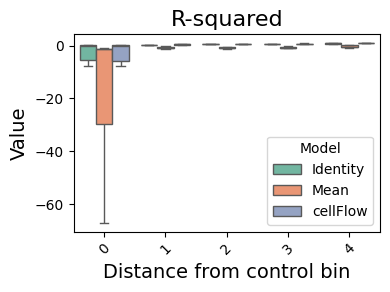

In [55]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="r_squared", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("R-squared", fontsize=16)
plt.xlabel("Distance from control bin", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

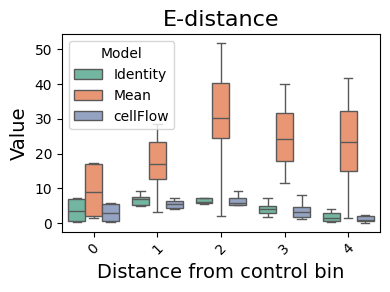

In [56]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="e_distance", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("E-distance", fontsize=16)
plt.xlabel("Distance from control bin", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [32]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="sinkhorn_div_1", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("Sinkhorn 1", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [21]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="sinkhorn_div_10", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("Sinkhorn 10", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [22]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="sinkhorn_div_100", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("Sinkhorn 100", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [23]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="mmd", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("MMD", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()